In [1]:
import yfinance as yf
import pandas as pd
#import matplotlib.pyplot as plt

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
ticker_symbol = 'AAPL'  # Substitua 'AAPL' pelo ticker do ativo financeiro desejado
start_date = '2022-01-01'  # Defina a data de início do histórico de dados
end_date = '2023-01-01'  # Defina a data de término do histórico de dados
moving_average_window = 20  # Janela da média móvel (20 dias neste exemplo)
num_standard_deviations = 2.5  # Número de desvios padrão para a banda superior e inferior
stop_loss_percent = 0.05  # Valor percentual para o stop loss (5% neste exemplo)

In [3]:
def download_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Baixar dados históricos do Yahoo Finance
data = download_historical_data(ticker_symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144318,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405670,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100


In [11]:
import random
tamanho_do_dataframe = 251
data['Cumulative_Returns'] = [random.randint(0, 100) for _ in range(tamanho_do_dataframe)]

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume,Returns,Position,SMA,Upper_Band,Lower_Band,Signal,Cumulative_Returns
Date,,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900,NaN,0,NaN,NaN,NaN,0,89
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144318,99310400,-0.012692,0,NaN,NaN,NaN,0,59
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405670,94537600,-0.026600,0,NaN,NaN,NaN,0,60
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000,-0.016693,0,NaN,NaN,NaN,0,56
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100,0.000988,0,NaN,NaN,NaN,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,-0.002798,0,140.6610,155.143136,126.178865,0,93
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800,-0.013878,0,139.9515,155.425055,124.477945,0,1
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400,-0.030685,0,139.1950,156.481947,121.908053,0,56


In [18]:
def calculate_cumulative_returns(data):
    data['Returns'] = data['Close'].pct_change()
    data['Position'] = 0  # Inicializa a coluna 'Position'
    data_with_positions = trading_strategy(data, moving_average_window, num_standard_deviations, stop_loss_percent)
    data['Cumulative_Returns'] = (data_with_positions['Returns'] * data_with_positions['Position']).cumsum()
    return data['Cumulative_Returns']

# Calcular os retornos acumulados
data['Cumulative_Returns'] = calculate_cumulative_returns(data)

<AxesSubplot:>

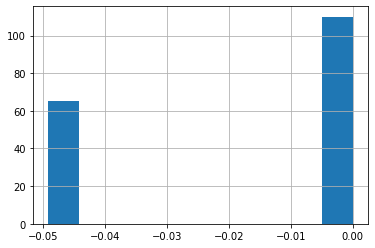

In [20]:
data['Cumulative_Returns'].hist()

In [7]:
def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

def calculate_standard_deviation(data, window):
    return data['Close'].rolling(window=window).std()

In [17]:
def trading_strategy(data, ma_window, num_std, stop_loss_percent):
    data['SMA'] = calculate_moving_average(data, ma_window)
    data['Upper_Band'] = data['SMA'] + (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Lower_Band'] = data['SMA'] - (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Signal'] = 0
    data['Position'] = 0

    for i in range(ma_window, len(data)):
        if data['Close'][i] > data['Upper_Band'][i]:
            data['Signal'][i] = -1  # Sinal de venda
        elif data['Close'][i] < data['Lower_Band'][i]:
            data['Signal'][i] = 1  # Sinal de compra

        if data['Position'][i - 1] == 1 and data['Cumulative_Returns'][i] < (1 - stop_loss_percent):
            data['Signal'][i] = -1  # Aciona o stop loss e vende a posição
            data['Position'][i] = 0
        elif data['Position'][i - 1] == -1 and data['Cumulative_Returns'][i] > 0:
            data['Signal'][i] = 1  # Venda a descoberto, aciona o stop loss e compra a posição
            data['Position'][i] = 0
        else:
            data['Position'][i] = data['Signal'][i]  # Mantém a posição atual

    data.dropna(inplace=True)
    return data


# Aplicar a estratégia de trading com stop loss
data_with_signals = trading_strategy(data, moving_average_window, num_standard_deviations, stop_loss_percent)

In [ ]:
def calculate_drawdown(data):
    data['Peak'] = data['Close'].cummax()
    data['Drawdown'] = (data['Peak'] - data['Close']) / data['Peak']
    return data['Drawdown']

# Calcular o drawdown
data_with_signals['Drawdown'] = calculate_drawdown(data_with_signals)

In [ ]:
# Criar a figura com múltiplos gráficos (subplot)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plotar o gráfico da estratégia na primeira posição do subplot
plot_trading_signals(data_with_signals)

# Plotar o gráfico do drawdown na segunda posição do subplot
plot_drawdown(data_with_signals)

# Plotar o gráfico dos retornos acumulados na terceira posição do subplot
plot_cumulative_returns(data_with_signals)

# Ajustar o layout para evitar sobreposição de elementos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [ ]:
def plot_trading_signals(data):
    plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='black')
    plt.plot(data.index, data['SMA'], label='Média Móvel Simples', color='blue')
    plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], alpha=0.2, color='gray')
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Compra')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Venda')
    plt.title('Estratégia de Reversão à Média com 2,5 Desvios Padrão')
    plt.legend()

def plot_drawdown(data):
    plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
    plt.fill_between(data.index, data['Drawdown'], alpha=0.2, color='red')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Drawdown ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Drawdown')
    plt.legend()

def plot_cumulative_returns(data):
    positive_returns = data['Cumulative_Returns'] >= 0
    plt.fill_between(data.index, data['Cumulative_Returns'], where=positive_returns, alpha=0.2, color='green')
    plt.fill_between(data.index, data['Cumulative_Returns'], where=~positive_returns, alpha=0.2, color='red')
    plt.plot(data.index, data['Cumulative_Returns'], color='green' if data['Cumulative_Returns'].iloc[-1] >= 0 else 'red', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Retornos Acumulados da Estratégia')
    plt.xlabel('Data')
    plt.ylabel('Retornos Acumulados')
    plt.legend()